=== Logistic Regression for Price Classification ===
Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        94
           1       0.88      0.87      0.88       106

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

Coefficients: [[ 2.25395082  0.83468966 -1.37990178]]
Intercept: [0.02710445]


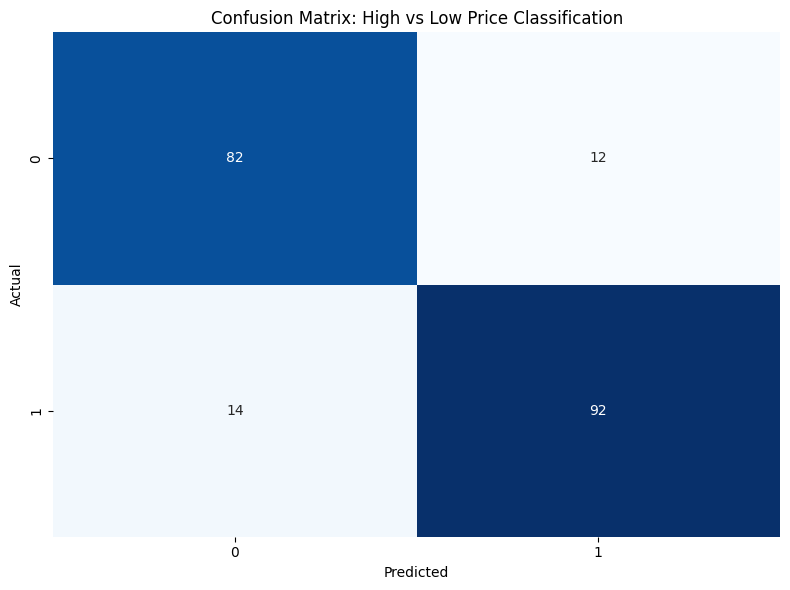


Confusion matrix plot displayed above and saved as 'logistic_regression_confusion_matrix.png'


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic housing data
n_samples = 1000
size = np.random.normal(2000, 500, n_samples)  # House size in sq ft
bedrooms = np.random.randint(1, 6, n_samples)  # Number of bedrooms
age = np.random.normal(20, 10, n_samples)     # Age of house in years
price = 100000 + 150 * size + 20000 * bedrooms - 5000 * age + np.random.normal(0, 50000, n_samples)

# Create DataFrame
data = pd.DataFrame({
    'size': size,
    'bedrooms': bedrooms,
    'age': age,
    'price': price
})

# Logistic Regression Model (for binary classification: high vs low price)
print("=== Logistic Regression for Price Classification ===")

# Create binary target (1 for high price, 0 for low price)
median_price = data['price'].median()
y_binary = (data['price'] > median_price).astype(int)

# Features
X = data[['size', 'bedrooms', 'age']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: High vs Low Price Classification')
plt.tight_layout()
plt.savefig('logistic_regression_confusion_matrix.png')
plt.show()  # Display plot inline in Colab
plt.close()

print("\nConfusion matrix plot displayed above and saved as 'logistic_regression_confusion_matrix.png'")